<a href="https://colab.research.google.com/github/bipingc/Node-Pong/blob/master/JP_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import scipy
import requests

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [8]:
#importing the dataset for NY state
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Fixed_Broadband_Deployment_Data.csv"

df_master = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_master.columns

Index(['Logical Record Number', 'Provider ID', 'FRN', 'Provider Name',
       'DBA Name', 'Holding Company Name', 'Holding Company Number',
       'Holding Company Final', 'State', 'Census Block FIPS Code',
       'Technology Code', 'Consumer', 'Max Advertised Downstream Speed (mbps)',
       'Max Advertised Upstream Speed (mbps)', 'Business'],
      dtype='object')

In [10]:
df_master.shape

(2225715, 15)

In [11]:
#discrepency check
verify_count = (df_master['State']=="NY").sum()
verify_count

2225715

In [12]:
df_master.head(10)

,Logical Record Number,Provider ID,FRN,Provider Name,DBA Name,Holding Company Name,Holding Company Number,Holding Company Final,State,Census Block FIPS Code,Technology Code,Consumer,Max Advertised Downstream Speed (mbps),Max Advertised Upstream Speed (mbps),Business
0,19915078,56300,19027440,CSC Holdings LLC,Cablevision,"Altice USA, Inc.",130370,Altice,NY,360594129003016,42,1,400.0,35.0,1
1,60785458,55262,18756155,"VSAT Systems, LLC",Skycasters,"VSAT Systems, LLC",300167,"VSAT Systems, LLC",NY,360595199004008,60,1,2.0,1.3,1
2,60278752,59349,1568880,GCI Communication Corp.,GCI Communication Corp.,GCI Holdings LLC,130534,GCI Holdings LLC,NY,361190004024000,60,0,0.0,0.0,1
3,60962360,55262,18756155,"VSAT Systems, LLC",Skycasters,"VSAT Systems, LLC",300167,"VSAT Systems, LLC",NY,361190123011007,60,1,2.0,1.3,1
4,27666300,58623,25646373,"Charter Communications, Inc.",Charter Communications Inc,Charter Communications,130235,Charter Communications,NY,360550117052014,43,1,940.0,35.0,1
5,15569733,56004,4963088,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111,"ViaSat, Inc.",NY,360775915004037,60,1,35.0,3.0,1
6,19906612,56300,19027440,CSC Holdings LLC,Cablevision,"Altice USA, Inc.",130370,Altice,NY,360593025011003,42,1,300.0,35.0,1
7,915295,54331,5015607,"DTC Cable, Inc.",DTC CABLE,Delhi Telephone Company,130399,Delhi Telephone Company,NY,360259701001067,50,1,250.0,250.0,1
8,60369835,54694,12369286,"HNS License Sub, LLC",HughesNet,"Hughes Network Systems, LLC",130627,"Hughes Network Systems, LLC",NY,360290150012016,60,1,25.0,3.0,1
9,60836185,55262,18756155,"VSAT Systems, LLC",Skycasters,"VSAT Systems, LLC",300167,"VSAT Systems, LLC",NY,360775904004060,60,1,2.0,1.3,1


# Prompt 1

In [13]:
unique_provider_ID = df_master['Provider ID'].nunique()
unique_provider_ID

147

In [14]:
unique_provider_name = df_master['Provider Name'].nunique()
unique_provider_name

146

In [15]:
# Assuming the ID might have a mismatched record, lets use the unique number of provider name.
unique_block_code = df_master['Census Block FIPS Code'].nunique()
unique_block_code

350169

In [16]:
provider_counts_per_block = df_master.groupby('Census Block FIPS Code')['Provider Name'].nunique()
mean_provider = provider_counts_per_block.mean()
print(mean_provider)
median_provider = provider_counts_per_block.median()
print(median_provider)

5.854250376246898
6.0


In [17]:
blocks_with_mean = (provider_counts_per_block == mean_provider).sum()
print(blocks_with_mean)
blocks_with_median = (provider_counts_per_block == median_provider).sum()
print(blocks_with_median)

0
143225


# Prompt 2

In [18]:
cond= {'Provider Name': 'nunique', 'Max Advertised Downstream Speed (mbps)' : 'mean', 'Max Advertised Upstream Speed (mbps)':'mean'}
block_summary = df_master.groupby('Census Block FIPS Code').agg(cond)
block_summary = block_summary.rename(columns={'Provider Name': 'Count of Providers','Max Advertised Downstream Speed (mbps)':'Avg Max Advertised Downstream Speed (mbps)', 'Max Advertised Upstream Speed (mbps)':'Avg Max Advertised Upstream Speed (mbps)'})

In [19]:
correlation1 = block_summary['Count of Providers'].corr(block_summary['Avg Max Advertised Downstream Speed (mbps)'], method='pearson')
print(correlation1)
correlation_spr_1 = block_summary['Count of Providers'].corr(block_summary['Avg Max Advertised Downstream Speed (mbps)'], method='spearman')
print(correlation_spr_1)
correlation2 = block_summary['Count of Providers'].corr(block_summary['Avg Max Advertised Upstream Speed (mbps)'], method='pearson')
print(correlation2)
correlation_spr_2 = block_summary['Count of Providers'].corr(block_summary['Avg Max Advertised Upstream Speed (mbps)'], method='spearman')
print(correlation_spr_2)

0.42286314927288
0.3312238060369817
0.34045021211832965
0.40419909936422405


In [20]:
correlation_coef, p_value = pearsonr(block_summary['Count of Providers'], block_summary['Avg Max Advertised Downstream Speed (mbps)'])

print("Pearson correlation coefficient:", correlation_coef)
print("P-value:", p_value)

Pearson correlation coefficient: 0.4228631492728781
P-value: 0.0


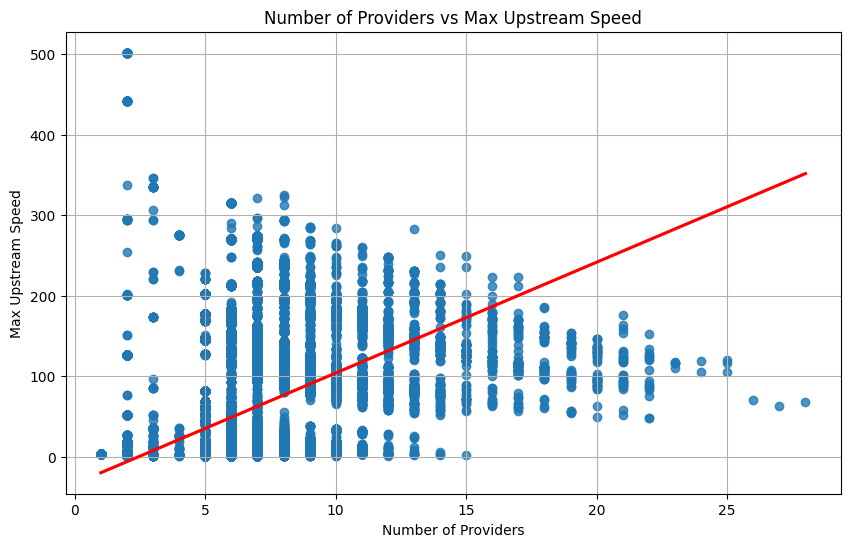

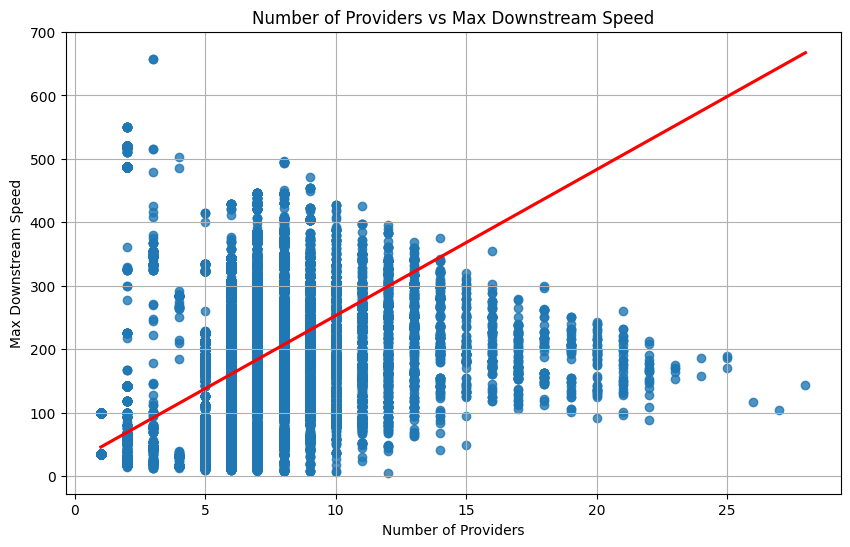

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(data=block_summary, x='Count of Providers', y='Avg Max Advertised Upstream Speed (mbps)', ci=None, line_kws={"color":"red"})
plt.title('Number of Providers vs Max Upstream Speed')
plt.xlabel('Number of Providers')
plt.ylabel('Max Upstream Speed')
plt.grid(True)
plt.show()

# Scatter plot for Number of Providers vs Max Downstream Speed
plt.figure(figsize=(10, 6))
sns.regplot(data=block_summary, x='Count of Providers', y='Avg Max Advertised Downstream Speed (mbps)', ci=None, line_kws={"color":"red"})
plt.title('Number of Providers vs Max Downstream Speed')
plt.xlabel('Number of Providers')
plt.ylabel('Max Downstream Speed')
plt.grid(True)
plt.show()

# Prompt 3: Is there variation in available internet speed by geography? Which areas or types of places have the fastest internet?


In [23]:
block_summary2 = block_summary.reset_index()
block_summary2 = block_summary2[['Census Block FIPS Code', 'Avg Max Advertised Downstream Speed (mbps)','Avg Max Advertised Upstream Speed (mbps)']]

In [28]:
from scipy.stats import f_oneway

# Perform one-way ANOVA for downstream speed
f_statistic_downstream, p_value_downstream = f_oneway(block_summary2['Avg Max Advertised Downstream Speed (mbps)'], block_summary2['Census Block FIPS Code'])

# Perform one-way ANOVA for upstream speed
f_statistic_upstream, p_value_upstream = f_oneway(block_summary2['Avg Max Advertised Upstream Speed (mbps)'], block_summary2['Census Block FIPS Code'])

print("Downstream Speed ANOVA:")
print("F-statistic:", f_statistic_downstream)
print("P-value:", p_value_downstream)

print("\nUpstream Speed ANOVA:")
print("F-statistic:", f_statistic_upstream)
print("P-value:", p_value_upstream)

Downstream Speed ANOVA:
F-statistic: 384079002335.7042
P-value: 0.0

Upstream Speed ANOVA:
F-statistic: 384079002549.21844
P-value: 0.0
